In [121]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [84]:
green_taxi_data = pd.read_csv('green_tripdata_2020-12.csv')
yellow_taxi_data = pd.read_csv('yellow_tripdata_2020-12.csv')
fhv_taxi_data = pd.read_csv('fhv_tripdata_2020-12.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [85]:
green_taxi_data.info()
yellow_taxi_data.info()
fhv_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83130 entries, 0 to 83129
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               46292 non-null  float64
 1   lpep_pickup_datetime   83130 non-null  object 
 2   lpep_dropoff_datetime  83130 non-null  object 
 3   store_and_fwd_flag     46292 non-null  object 
 4   RatecodeID             46292 non-null  float64
 5   PULocationID           83130 non-null  int64  
 6   DOLocationID           83130 non-null  int64  
 7   passenger_count        46292 non-null  float64
 8   trip_distance          83130 non-null  float64
 9   fare_amount            83130 non-null  float64
 10  extra                  83130 non-null  float64
 11  mta_tax                83130 non-null  float64
 12  tip_amount             83130 non-null  float64
 13  tolls_amount           83130 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [86]:
green_taxi_data['lpep_pickup_datetime'] =  pd.to_datetime(green_taxi_data['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
green_taxi_data['lpep_dropoff_datetime'] =  pd.to_datetime(green_taxi_data['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
green_taxi_data['trip_duration'] = (green_taxi_data['lpep_dropoff_datetime'] - green_taxi_data['lpep_pickup_datetime']).dt.seconds
green_taxi_data['PULocationID'].fillna(-1, inplace = True)
green_taxi_data['DOLocationID'].fillna(-1, inplace = True)

yellow_taxi_data['tpep_pickup_datetime'] =  pd.to_datetime(yellow_taxi_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
yellow_taxi_data['tpep_dropoff_datetime'] =  pd.to_datetime(yellow_taxi_data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
yellow_taxi_data['trip_duration'] = (yellow_taxi_data['tpep_dropoff_datetime'] - yellow_taxi_data['tpep_pickup_datetime']).dt.seconds
yellow_taxi_data['PULocationID'].fillna(-1, inplace = True)
yellow_taxi_data['DOLocationID'].fillna(-1, inplace = True)



fhv_taxi_data['pickup_datetime'] =  pd.to_datetime(fhv_taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
fhv_taxi_data['dropoff_datetime'] =  pd.to_datetime(fhv_taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
fhv_taxi_data['trip_duration'] = (fhv_taxi_data['dropoff_datetime'] - fhv_taxi_data['pickup_datetime']).dt.seconds
fhv_taxi_data['PULocationID'].fillna(-1, inplace = True)
fhv_taxi_data['DOLocationID'].fillna(-1, inplace = True)

In [87]:
green_date_wise_sum = green_taxi_data.groupby(green_taxi_data['lpep_pickup_datetime'].dt.date).sum()[2:-1]
yellow_date_wise_sum = yellow_taxi_data.groupby(yellow_taxi_data['tpep_pickup_datetime'].dt.date).sum()[4:-8]
fhv_date_wise_sum = fhv_taxi_data.groupby(fhv_taxi_data['pickup_datetime'].dt.date).sum()

Text(0, 0.5, 'Travel Duration (in secs)')

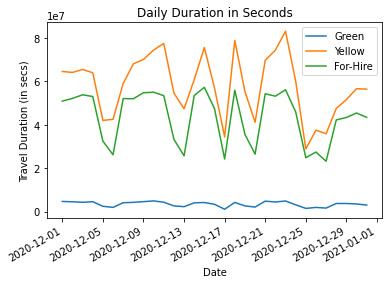

In [126]:
plt.plot(green_date_wise_sum.index,green_date_wise_sum['trip_duration'])
plt.plot(yellow_date_wise_sum.index,yellow_date_wise_sum['trip_duration'])
plt.plot(fhv_date_wise_sum.index,fhv_date_wise_sum['trip_duration'])
plt.legend(['Green','Yellow','For-Hire'])
plt.gcf().autofmt_xdate()
plt.title('Daily Duration in Seconds')
plt.xlabel('Date')
plt.ylabel('Travel Duration (in secs)')

In [89]:
green_PU_wise_sum = green_taxi_data[green_taxi_data['PULocationID'].notna()].groupby(green_taxi_data['PULocationID']).sum()
yellow_PU_wise_sum = yellow_taxi_data[yellow_taxi_data['PULocationID'].notna()].groupby(yellow_taxi_data['PULocationID']).sum()
fhv_PU_wise_sum = fhv_taxi_data[fhv_taxi_data['PULocationID'].notna()].groupby(fhv_taxi_data['PULocationID']).sum()

Text(0, 0.5, 'Travel Duration (in secs)')

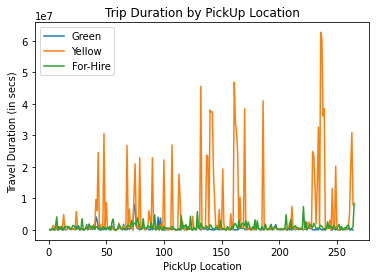

In [127]:
plt.plot(green_PU_wise_sum.index[:-1],green_PU_wise_sum[:-1]['trip_duration'])
plt.plot(yellow_PU_wise_sum.index[:-1],yellow_PU_wise_sum[:-1]['trip_duration'])
plt.plot(fhv_PU_wise_sum.index[1:],fhv_PU_wise_sum[1:]['trip_duration'])
plt.legend(['Green','Yellow','For-Hire'])
plt.title('Trip Duration by PickUp Location')
plt.xlabel('PickUp Location')
plt.ylabel('Travel Duration (in secs)')

In [107]:
train_X = yellow_taxi_data[['PULocationID','DOLocationID']]
train_y = yellow_taxi_data[['trip_duration']]
model_y = yellow_taxi_data[['total_amount']]
test_X = fhv_taxi_data[['PULocationID','DOLocationID']]
test_y = fhv_taxi_data[['trip_duration']]

<AxesSubplot:>

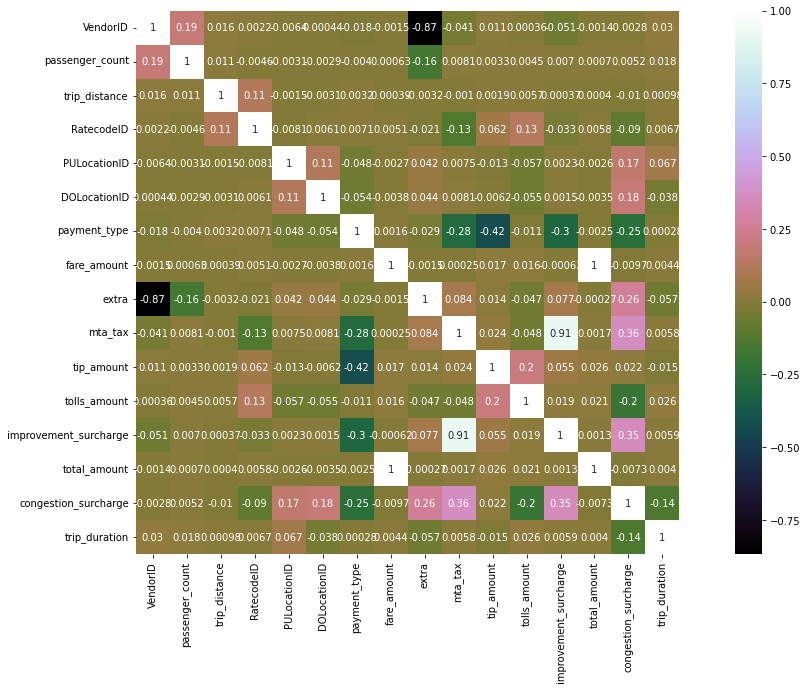

In [111]:
corr_mat=yellow_taxi_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [117]:
reg = LinearRegression().fit(train_X, train_y)
print(reg.score(train_X, train_y))
print("coeff -" + str(reg.coef_))
print("intercept-"+str(reg.intercept_))

0.006603323562151875
coeff -[[ 6.82346983 -4.06077363]]
intercept-[754.75303061]


In [122]:
pred_y = reg.predict(test_X)
reg.score(test_X,test_y) #The coefficient of determination

-0.22797985675753418

In [125]:
np.mean(pred_y-test_y)

trip_duration   -739.259759
dtype: float64

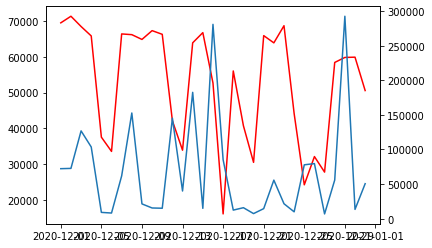

In [42]:
import matplotlib.pyplot as plt
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(pt.index, pt['fare_amount'],color='red')
ax_right.plot(pt.index, pt['trip_distance'])

#plt.show()


In [37]:
pt

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,
0,934.0,632.0,64606,78286,634.0,2285.01,9241.75,252.25,227.0,827.10,190.72,0.0,179.4,11104.97,745.0,530.0,189.75
1,602.0,447.0,40118,48310,392.0,1399.00,5562.21,149.50,139.5,487.16,85.19,0.0,106.2,6634.26,475.0,343.0,104.50
2,306.0,244.0,23517,27499,179.0,913.09,3486.28,69.25,66.5,299.73,99.74,0.0,59.1,4193.35,242.0,174.0,99.00
3,206.0,150.0,24871,30062,124.0,1303.69,4951.46,48.25,46.5,366.78,153.00,0.0,62.1,5698.79,166.0,114.0,52.25
4,194.0,138.0,69068,80749,114.0,171487.95,14727.46,45.75,45.5,1471.06,455.59,0.0,174.6,17007.96,160.0,109.0,82.50
5,521.0,481.0,107033,120310,359.0,6824.80,23991.80,124.75,127.0,2103.74,1334.42,0.0,243.3,28046.01,412.0,343.0,99.00
6,1566.0,1046.0,207889,252115,1118.0,108550.71,47762.17,103.00,401.0,3953.71,2602.05,0.0,529.8,55661.23,1173.0,897.0,351.75
7,2939.0,1937.0,392292,461859,2059.0,286048.96,74253.00,186.75,757.5,7686.95,2812.89,0.0,1034.7,87692.49,2171.0,1662.0,1017.50
8,4200.0,2648.0,576415,681349,3036.0,69639.95,104363.27,273.25,1120.0,11167.69,2935.10,0.0,1530.0,122946.56,3251.0,2388.0,1650.00
